# Classification of Synthesis Parameters using word2vec
Approach: Get 
### Current problem and solution: 
KeyError Words not in library: pass the word


In [44]:
import numpy as np
from gensim.models import Word2Vec
import pickle
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
import pandas as pd

In [45]:
model = Word2Vec.load("./materials-word-embeddings/bin/word2vec_embeddings-SNAPSHOT.model")
model.hs = 1
model.negative = 0

In [46]:
with open('total_data.pkl','rb') as f:
    total_data = pickle.load(f)

In [54]:
new_model = model.wv

In [73]:
new_model.word_vec("QDs")

array([-0.09899443, -0.69176954,  2.7407694 , -0.47118157,  1.9888113 ,
       -2.8515708 , -0.7850326 ,  0.89515847, -3.3176289 , -2.1286538 ,
        1.1970509 ,  2.239879  , -0.40494677,  0.8729254 , -4.5715427 ,
        0.1306337 , -1.3941231 ,  0.8411274 ,  0.38635984,  1.46162   ,
       -0.6656054 , -3.4792304 , -1.1453779 , -0.9220483 ,  2.2963088 ,
        4.9410505 ,  2.756439  ,  2.0915952 ,  3.2482626 , -0.4653382 ,
        1.4816147 ,  0.73095226, -1.0378739 ,  2.9197655 , -2.2549117 ,
       -0.0509843 ,  0.7562244 ,  1.9310673 , -0.993877  ,  1.0662283 ,
       -2.0501587 ,  1.4537895 , -1.2397408 ,  2.6312962 , -0.99117583,
       -0.9104796 ,  1.3159024 , -1.1498686 ,  0.9318686 , -0.33168626,
        1.7543606 , -0.43195266,  0.2087876 ,  0.7875881 ,  1.6752002 ,
        0.8053091 ,  0.7690944 ,  1.8695495 ,  1.7305486 ,  0.35823444,
        1.4469795 ,  1.8080853 ,  2.7777166 , -0.8551236 ,  3.1913948 ,
       -4.2761    ,  1.7733904 , -5.2123733 ,  3.0905735 , -0.52

In [67]:
def doc2vec(list_):
    # get average vector for a paragraph
    new = np.zeros((100,))
    count = 0
    for word in list_:
        try:
            new = np.add(new,new_model.word_vec(word))
            count += 1
        except:
            continue
    return new/count

In [84]:
list_x = []
list_y = []
dataset = []
for key in total_data.keys():
    # fitting paper into tfidf vector
    for paragraph in total_data[key]:
        if paragraph[-1] == 1:
            dataset.append(doc2vec(paragraph[0].split()))
            if paragraph[-2] is False:
                list_y.append(0)
            else:
                list_y.append(1)

/home/duc/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [85]:
arr = np.asarray(dataset)
y_train = np.asarray(list_y)
len_train = int(len(y_train)*0.9)
X, X_test = arr[:len_train], arr[len_train:]
y, Y_test = y_train[:len_train], y_train[len_train:]
print(X.shape)
print(y.shape)

(2731, 100)
(2731,)


In [99]:
#replace Nan with 0 and inf with finite
X = np.nan_to_num(X)

In [100]:
def over_sampler(X,y):
    count = np.sum(y)
    idxx = np.argwhere(y==1)[:,0]
    new_idxx = np.random.choice(idxx, np.sum(y==0)- np.sum(y))
    X_0 = np.concatenate([X, X[new_idxx]],axis=0)
    y_0 = np.concatenate([y, y[new_idxx]])
    return X_0, y_0

In [101]:
X_train, Y_train = over_sampler(X, y)
print(X_train.shape)
print(Y_train.shape)

(4862, 100)
(4862,)


In [102]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/home/duc/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.7073552425665102
[[1971  460]
 [ 849 1582]]


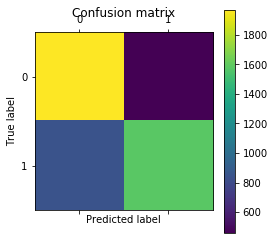

In [103]:
y_pred = model.predict(X_train)
print(f1_score(Y_train, y_pred))
cm = confusion_matrix(Y_train, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [105]:
X_test = np.nan_to_num(X_test)

0.2173913043478261
[[222  62]
 [ 10  10]]


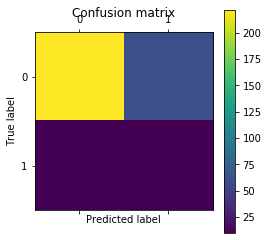

In [106]:
Y_pred = model.predict(X_test)
print(f1_score(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()